In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data.rename(columns={'Serial No.': 'Serial No.', 'GRE Score':'GRE Score', 'TOEFL Score':'TOEFL Score', 
                     'University Rating':'University Rating', 'SOP':'SOP', 'LOR ':'LOR', 
                     'CGPA':'CGPA', 'Research':'Research', 'Chance of Admit ': 'Candidate_rating'},inplace = True)

In [8]:
data.set_index('Serial No.',inplace = True)

In [9]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Candidate_rating
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


#### minimum CGPA recorded

In [10]:
data['CGPA'].min()*0.4 # on a 4.0 scale

2.72

#### maximum CGPA recorded

In [11]:
data['CGPA'].max()*0.4 # on a 4.0 scale

3.968

#### average CGPA

In [12]:
data['CGPA'].mean()*0.4 # on a 4.0 scale

3.4305760000000016

#### SOP scoring

In [13]:
data['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

C:\Users\DADA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


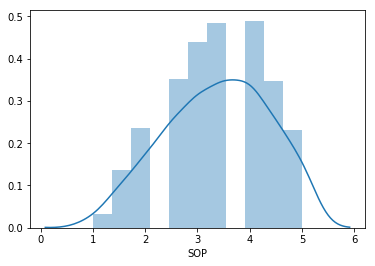

In [14]:
sns.distplot(data['SOP'])

#### LOR scoring

In [15]:
data['LOR'].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

#### GRE scores

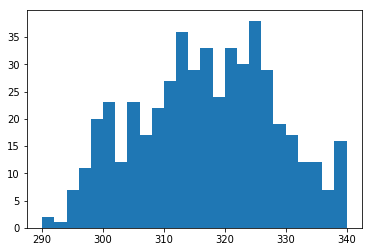

In [16]:
plt.hist(data['GRE Score'],bins=25)
plt.show()

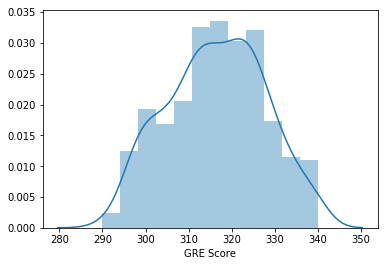

In [17]:
sns.distplot(data['GRE Score'])

#### TOEFL scores

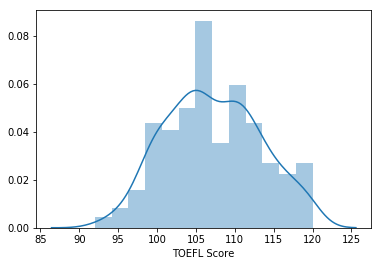

In [18]:
sns.distplot(data['TOEFL Score'])

#### University ratings

In [19]:
data['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

#### Data feature relationshps

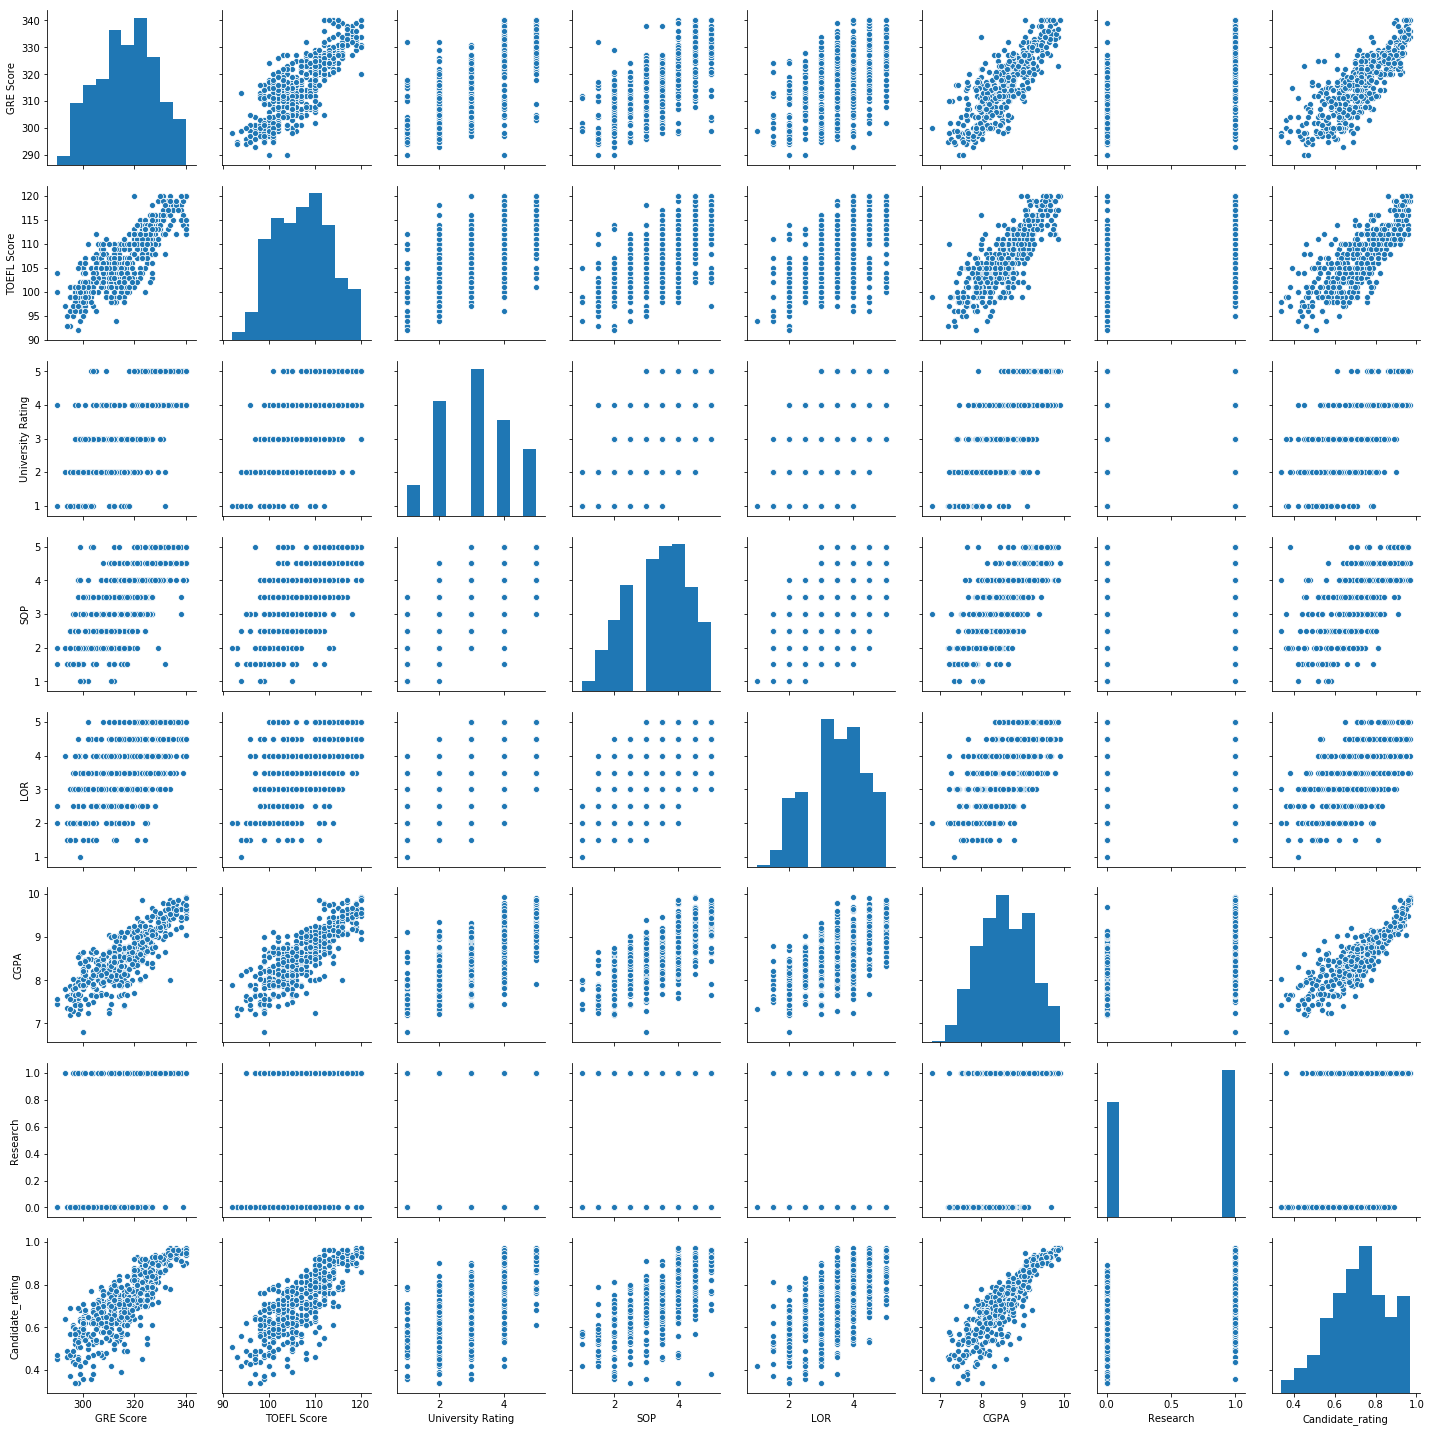

In [20]:
sns.pairplot(data)

#### The strongest correlations are observed with the 'CGPA', 'TOEFL Score' features and candidate rating